[4.53978687e-05 1.23394576e-04 3.35350130e-04 9.11051194e-04
 2.47262316e-03 6.69285092e-03 1.79862100e-02 4.74258732e-02
 1.19202922e-01 2.68941421e-01 5.00000000e-01 7.31058579e-01
 8.80797078e-01 9.52574127e-01 9.82013790e-01 9.93307149e-01
 9.97527377e-01 9.99088949e-01 9.99664650e-01 9.99876605e-01]


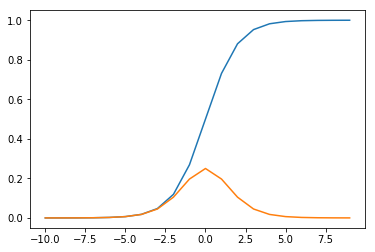

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage


% matplotlib inline
    
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes



import numpy as np ##this means you can access numpy functions by writing np.functions
def sigmoid(x):
    """
    compute the sigmoid of x
    Arguments:
    x--A scalar or numpy array of any size
    Return:
    s--sigmoid(x)
    """
    ###start code here ###
    s=1.0/(1+1/np.exp(x))
    return s


##sigmoid gradient function
def sigmoid_derivative(x):
    """
    Compute the gradient(also call the slope of derivative) of the sigmoid function with respect to its input vector 
    You can store the output of the sigmoid function into variables and then use it to calculate gradient
    Arguments:
    x--A scalar or numpy array
    
    Return :
    ds---the computed gradient
    
    """
    ### store code here ###
    s=1.0/ (1+1/np.exp(x))
    ds=s*(1-s)
    return ds


x=range(-10,10)
b=sigmoid(x)
c=sigmoid_derivative(x)
print(b)
import matplotlib.pyplot as plt
plt.plot(x,b)
plt.plot(x,c)
plt.show()

In [24]:
## graded function :image2vector
def image2vector(image):
    """
    Argument:
    image--a numpy array of shape(length ,height,depth)
    returns:
    v--a vector of shape(length*height*depth,1)
    
    """
    ### start code here ###
    v=image.reshape(image.shape[0]*image.shape[1]*image.shape[2],1)
    ### end code here
    
    return v

# This is a 3 by 3 by 2 array, typically images will be (num_px_x, num_px_y,3) where 3 represents the RGB values
image = np.array([[[ 0.67826139,  0.29380381],
        [ 0.90714982,  0.52835647],
        [ 0.4215251 ,  0.45017551]],

       [[ 0.92814219,  0.96677647],
        [ 0.85304703,  0.52351845],
        [ 0.19981397,  0.27417313]],

       [[ 0.60659855,  0.00533165],
        [ 0.10820313,  0.49978937],
        [ 0.34144279,  0.94630077]]])
print(image)
b=image2vector(image)
print(b)



[[[0.67826139 0.29380381]
  [0.90714982 0.52835647]
  [0.4215251  0.45017551]]

 [[0.92814219 0.96677647]
  [0.85304703 0.52351845]
  [0.19981397 0.27417313]]

 [[0.60659855 0.00533165]
  [0.10820313 0.49978937]
  [0.34144279 0.94630077]]]
[[0.67826139]
 [0.29380381]
 [0.90714982]
 [0.52835647]
 [0.4215251 ]
 [0.45017551]
 [0.92814219]
 [0.96677647]
 [0.85304703]
 [0.52351845]
 [0.19981397]
 [0.27417313]
 [0.60659855]
 [0.00533165]
 [0.10820313]
 [0.49978937]
 [0.34144279]
 [0.94630077]]


In [26]:
## graded function:normalizerows
def normalizeRows(x):
    """
    
    Implement a function that normalizes each row of matrix x (to have unit length)
    Argument:
    x--A numpy matrix of shape(n,m)
    
    Returns:
    x--the normalized(by row) numpy matrix .You are allowed to modify x
    
    """
    ###star code here###
    #Compute x_norm as norm 2 of x. use np.linalg.norm(...,ord=2,axis=...)
    x_norm=np.linalg.norm(x,axis=1,keepdims=True)
    #divide x by its norm.
    x=x/x_norm ##broadcasting 
    ###end code here
    return x

## graded function:normalizeColumns
def normalizeColumn(x):
    """
    
    Implement a function that normalizes each column of matrix x (to have unit length)
    Argument:
    x--A numpy matrix of shape(n,m)
    
    Returns:
    x--the normalized(by row) numpy matrix .You are allowed to modify x
    
    """
    ###star code here###
    #Compute x_norm as norm 2 of x. use np.linalg.norm(...,ord=2,axis=...)
    x_norm=np.linalg.norm(x,axis=0,keepdims=True)
    #divide x by its norm.
    x=x/x_norm ##broadcasting 
    ###end code here
    return x

x = np.array([
    [0, 3, 4],
    [1, 6, 4]])
b=normalizeRows(x)
c=normalizeColumn(x)
print(x)
print(b)
print(c)

[[0 3 4]
 [1 6 4]]
[[0.         0.6        0.8       ]
 [0.13736056 0.82416338 0.54944226]]
[[0.         0.4472136  0.70710678]
 [1.         0.89442719 0.70710678]]


In [35]:
##graded function:softmax
def softmax(x):
    """
    Calculates the softmax function for each row of input x.
    code can work for a row vector and also for matrices of shape(n,m)
    Argument:
    x--A numpy matrix of shape(n,m)
    
    Returns:
    s--A numpy matrix equal to the softmax of x,of shape (n,m)
    """
    ###start code here###
    #apply exp() element wise to x. 
    x_exp=np.exp(x) 
    #create a vector x_sum that sums each row of x_exp
    x_sum=np.sum(x_exp,axis=1,keepdims=True) #(n,1)
    #compute softmax(x) by dividing x_exp by x_sum .it should automatically use numpy broadcasting
    s=x_exp/x_sum #(n,m)
    ###end code here###
    return s

x = np.array([
    [9, 2, 5, 0, 0],
    [7, 5, 0, 0 ,0]])
print("softmax(x)="+str(softmax(x)))
    


softmax(x)=[[9.80897665e-01 8.94462891e-04 1.79657674e-02 1.21052389e-04
  1.21052389e-04]
 [8.78679856e-01 1.18916387e-01 8.01252314e-04 8.01252314e-04
  8.01252314e-04]]


In [ ]:
##vectorzation 
##in deep learning ,you deal with very large datasets,a non-computationanlly-optimal function can become a
##huge bottleneck in your algorithm and can result in a model that takes ages to run. to make sure that your 
##code is computationally efficient ,you will use vectorization. for example ,try to tell the difference between
##teh following implementations of the dot/outer/elementwise product.
import time
x1 = np.random.normal(loc=0,scale=1,size=50000000)
x2 = np.random.normal(loc=0,scale=1,size=50000000)

### classic dot product of vectors implementation
tic=time.process_time()
dot=0
for i in range(len(x1)):
    dot+=x1[i]*x2[i]
toc=time.process_time()
print("dot="+str(dot)+'\n-----Computation time='+str(1000*(toc-tic))+"ms")

tic1=time.process_time()
dot=np.dot(x1,x2)
toc1=time.process_time()
print("dot="+str(dot)+'\n-----Computation time='+str(1000*(toc1-tic1))+"ms")


In [ ]:
##vectorzation 
##in deep learning ,you deal with very large datasets,a non-computationanlly-optimal function can become a
##huge bottleneck in your algorithm and can result in a model that takes ages to run. to make sure that your 
##code is computationally efficient ,you will use vectorization. for example ,try to tell the difference between
##teh following implementations of the dot/outer/elementwise product.
import time
x1 = np.random.normal(loc=0,scale=1,size=50000)
x2 = np.random.normal(loc=0,scale=1,size=50000)

### classic dot product of vectors implementation
tic=time.process_time()
dot=0
for i in range(len(x1)):
    dot+=x1[i]*x2[i]
toc=time.process_time()
print("dot="+str(dot)+'\n-----Computation time='+str(1000*(toc-tic))+"ms")

tic1=time.process_time()
dot=np.dot(x1,x2)
toc1=time.process_time()
print("dot="+str(dot)+'\n-----Computation time='+str(1000*(toc1-tic1))+"ms")


In [5]:
##Logistic regression with neural network 
##Build the general architecture of  a learning algorithm,including:
#Initializing parameters
#Calculating the cost function and its gradient
#Using an optimization algorithm that is gradient descent
#Gather all three functions above into main model function ,in the right order.

### First ,let's run the cell below to import all the packages that you will need during this assignment.
# numpy package is the fundametal package for scientific computing with Python
#h5py package is a famous library to interact with a dataset that is stored on an H5 file.
#matplotlib is a famous library to plot graphs in Python
#PIL and scipy are used here to test you model with you own picture at the end 
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
%matplotlib inline

### Loading the data(cat /not cat)
train_set_x_orig,train_set_y,test_set_x_orig,test_set_y,classes=load_dataset()
#Example of a picture
index=25
plt.imshow(train_set_x_orig[index])
print("y="+str(train_set_y[:,index])+", it's a '"+classes[np.squeeze(train_set_y[:,index])].decode("utf-8")+"picture.")

##Many software bugs in deep learning come from having matrix /vector dimensions that don't fit.If you can keep
##your matrix/vector dimensions straight you will go a long way toward eliminating many bugs
# find the number of training examples /number of test examples/width of a training image
#remember that train_set_x_orig is a tensors  shape (m_train, num_px, num_px, 3) ,so access number of training example
#by writing train_set_x_orig.shape[0]

###start code here ###
m_train=train_set_x_orig.shape[0] # number of training examples
m_test=test_set_x_orig.shape[0]#number of test examples
num_px=train_set_x_orig.shape[1]#width of training image
###end code here###
print("Number of training examples:m_train="+str(m_train))
print("Number of training examples:m_test="+str(n_test))
print('Height/Width of each image:num_px='+str(num_px))
print('Each image is of size:('+str(num_px)+','+str(num_px)+',3')
print('train_set_x shape:'+str(train_set_x_orig.shape))
print("train_set_y shape:"+str(train_set_y.shape))
print("test_set_x shape:"+str(test_set_x.shape))
print("test_set_y shape:"+str(test_set_y.shape))

###Reshape images fo shape(num_px,num_px,3)in a numpy-array of shape (num_px*numpx*3,1)

### START CODE HERE ###
train_set_x_flatten=train_set_x_orig.reshape(m_train,-1).T
test_set_x_flatten=test_set_x_orig.reshape(m_test,-1).T
###END CORE HERE

###to represent color images ,the red green and blue channels(RGB) must be specified for pixel,and so the pixel value
#is actually a vector of three numbers ranging from 0 to 255
#one common preprocessing step in machine learning is to center and standardize your dataset,meaning that you substract
#the mean of the whole numpy array from each example,and then divide each each exmaple by the standard deviation of the 
#whole numpy array.But for picture datasets,it is simpler and more convenient and works almost as well to just divide every 
#row of the datasets by 255(the maximum value of a pixel channel)
#Let's standardize our dataset
train_set_x=train_set_x_flatten/255
test_set_x=test_set_x_flatten/255

####General Architercture of learning algorithm
##building the parts of our algorthm
##the main steps for building a neural network 
#  --Define the model structure(such as number of input features /hidden layer/the width of the model)
#--initialize the model's parameters
#--learn the parameters for the model by minimizing the cost function loop
           #-calculate current loss(forward propagation)
           #-calculate current gradient (backword propagation)
           #-update parameters (gradient descent)
#-use the learned parameters to make predictions(on the test set)
#-analyse the results and conclude

import numpy as np ##this means you can access numpy functions by writing np.functions
def sigmoid(x):
    """
    compute the sigmoid of x
    Arguments:
    x--A scalar or numpy array of any size
    Return:
    s--sigmoid(x)
    """
    ###start code here ###
    s=1.0/(1+1/np.exp(x))
    return s


    




ImportError: cannot import name 'load_dataset'

In [3]:
#GRADED FUNCTION:initialize_with_zeros
import numpy as np
def ini_parameters(dim):
    """
    This function creates a vector  of zeros of shape(dim,1) for w and initializes b to 0.
    Argument:
    dim--size of the w vector we want (or number of parameters in this case)
    Returns:
    w--initialized vector of shape(dim,1)
    b--initialized scalar( corresponds to the bias)
    
    """

    ### start code here ###
    w=np.zeros((dim,1))
    b=0
    ###end code here###
    assert(w.shape==(dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    return w,b

In [4]:
dim=2
w,b=ini_parameters(dim)
print("w="+str(w))
print("b="+str(b))

w=[[0.]
 [0.]]
b=0


In [8]:
##Forward and backword propagation 

#GRADED FUNCITON:PROPAGATE
import numpy as np
def propagate(w,b,X,Y):
    """
    Implement the cost function and its gradient 
    
    Arguments:
    w--weight,a numpy array of size(num_px*num_px*3,1)
    b--bias,a scalar
    X--data of size(num_px*num_px*3,number of examples)
    Y--ture "label" vector (containing 0 if not-cat,1 if cat) of size(1,number of examples)
    
    Return:
    cost--negative log-likelihood cost for logistic regression
    dw--gradient of the loss with respect to w,thus same shape as w
    db--gradient of the loss with respect to b,thus same shape as b
    
    Tips:
    --Write your code step by step for the propagation .np.log(), np.dot()
    
    """
    m=X.shape(1)
    #FORWARD PROPAGATION (FROM X TO COST)
    ###START CODE HERE###
    A=sigmoid(np.dot(w.T,X)+b)  #compute activation Y HAT
    cost=-(1.0/m)*np.sum(Y.np.log(A)+(1-Y)*np.log(1-A)) #compute cost funtion
    ###END CODE HERE
    
    #BACKWARD PROPAGETION(TO FIND GRADIENT)
    ###STAT CODE HERE###
    dw=(1.0/m)*np.dot(X,(A-Y).T)
    db=(1.0/m)*np.sum(A-Y)
    ###END CODE HERE###
    
    assert(dw.shape==w.shape)
    assert(dw.dtype==float)
    cost=np.squeeze(cost)
    assert(cost.shape==())
    
    grads={"dw":dw,
           "db":db}
    return grads,cost


In [2]:
import numpy as np
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads,cost=propagate(w,b,X,Y)
print('dw='+str(grads['dw']))
print("db="+str(grads['db']))
print("cost="+str(cost))


NameError: name 'propagate' is not defined

In [6]:
##optimization 
##you have initialized your parameters
##compute cost function and its gradient
##update the parameters using gradient descent.
#GRADED FUNCTION:OPTIMIZE
def optimize(w,b,X,Y,num_iterations,learning_rate,print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w--weights,a numpy array of size (num_px*num_px*3,1)
    b--bias,a scalar
    X--data of shape(num_px*num_px*3,number of examples)
    Y--true "label" vector (containing 0 if not-cat,1 if cat),of shape (1,number of examples)
    num_iterations--number of iterations of the optimization loop
    learning_rate--learning rate of the gardient descent update rule
    print_cost--True to print the loss every 100 steps
    
    Returns:
    params--dictionary containing the weights w and bias b
    grads--dictionary containing the gardients of the weights and bias with respect to the cost function
    costs--list of all the costs computed during the optimizaiton ,this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
         !) Calculate the cost and gradient for the current parameters.Use propagate().
         2)Update the parameters using gradient descent rule for w and b.
         
    """
    costs=[]
    for i in range(num_iterations):
        
        #Cost and gradient calculation
        ###START CODE HERE###
        grads,cost=propagate(w,b,X,Y)
        ###END CODE HERE###
        
        #Retrieve derivatives from grads
        dw=grads['dw']
        db=grads['db']
        
        #update rule
        w=w-learning_rate*dw
        b=b-learning_rate*db
        #end code here
        
        #Record the costs
        if i%100==0:
            costs.append(cost)
        
        #Print the cost every 100 training examples
        if print_cost and i%100==0:
            print("Cost after iteration %i:%f"%(i,cost))
            
        params={ "w":w,
                 "b":b}
        grads={"dw":dw,
               "db":db}
        return params,grads,costs

In [9]:
params,grads,costs=optimize(w,b,X,Y,num_iterations=100,learning_rate=0.09,print_cost=False)
print("w="+str(params["w"]))
print("b="+str(params["b"]))
print("dw="+str(grads['dw']))
print("db="+str(grads['db']))


TypeError: 'tuple' object is not callable

In [7]:
#The privious function will output the learned w and b.We are able to use w and b to predict the  labels 
# for dataset X。Implement the predict() function .There is two steps to computing predictions
#1. Calculate y hat=A(prob)
#2.convert the entries of a  into 0 (if activation<=0.5) or 1(if activation>0.5) ,stores the predictions in a vector
import numpy as np
###GRADED FUNCTION:PREDICT
def predict(w,b,X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression parameters
    
    Arguments:
    w--weights, a numpy array of size(num_px,num_px*3,1)
    b--bias,a scalar
    x--data of size(num_px*num_px*3,number of examples)
    
    Returns:
    Y_prediction--a numpy array (vecto) containing all predictions(0/1) for the examples in X
    """
    m=X.shape[1]
    Y_prediction=np.zeros((1,m))
    w=w.reshape(X.shape[0],1)
    #Compute vector "A" predicting the probabilities of cat being present in the picture 
    ###start code here###
    A=sigmoid(np.dot(w.T,X)+b)
    ###END CODE HERE###
    for i in range(A.shape[1]):
        #Convert probabilities A[0,i] to actual preditions p[0,i]
        ###START CODE HERE###
        if A[0,i]>0.5:
            Y_prediction[0,i]=1
        else:
            Y_prediction[0,i]=0
        ###END CODE HERE###
    assert(Y_prediction.shape==(1,m))
    
    return Y_prediction

    

In [8]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [3]:
##MERGE ALL FUNCTIONS INTO A MODEL
#You've implemented several functions that:
#-Initialize(w,b)
#-Optimize the loss iteratively to learn parameters(w,b):
#-Computing the cost and its gradient 
#-Updating the parameters using gradient descent
#-Use the learned(w,b) to predict the labels for geien set of examples
#You will now see how the overall model is structured by putting together all building blocks(funtions implement
# in the previous parts) together ,in the right order.
###GRADED FUNCITON:MODEL
import numpy as np
def model(x_train,y_train,x_test,y_test,num_iterations=2000,learning_rate=0,print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    
    x_train--training set represented by numpy array of shape(num_px*num_px*3,m_train)
    y_train--training set represented by numpy array of shape(1,m_train)
    x_test--test set represented by numpy array of shape (num_px*num_px*3,m_test)
    y_test--test set represented by numpy array of shape (1,m_test)
    num_iterations--hyperparameter representing the number of iterations to optimize the parameters
    learning_rate--hyperarameter representing the learning rate used in the update rule of optimize()
    print_cost--set to true to print the cost every 100 iterations
    
    Returns:
    d--dictinary containing information about the model
    """
    ###START CODE HERE###
    #initialize parameters with zeros()
    w,b=intialize_with_zero(x_train.shape[0])
    
    #Gradient descent
    parameters,grads,costs=optimize(w,b,x_train,y_train,num_iterations,learning_rate,print_cost)
    
    #Retrieve parameters w and b from dictionary "parameters"
    w=parameters['w']
    b=parameters['b']
    
    #predict test/train set examples 
    y_prediction_test=predict(w,b,x_test)
    y_prediction_train=predict(w,b,x_train)
    
    #end code here#
    
    #Print train/test Errors
    print("train accuracy:{}%".format(100-np.mean(np.abs(y_prediction_train-y_train))*100))
    print("test accuracy:{}%".format(100-np.mean(np.abs(y_prediction_test-y_test))*100)) 
    
    d={"costs":costs,
       "y_prediction_test":y_prediction_test,
       "y_prediction_train":y_prediction_train,
       "w":w,
       "b":b,
       "learning_rate":learning_rate,
       "num_iterations":num_iterations
        }
    
    return d

    


In [9]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

NameError: name 'train_set_x' is not defined

In [1]:
##Training accruracy is close to 100%.This is a good sanity check:your model is working and has high enough capacity to 
##fit the training data.Test error is 68%. It is actually not bad for this simple model,given the small dataset we used and 
##that logistic regression is a linear classifier .But no worries ,you'll build an even better classifier next week!
##Also ,you see that the model is clearly overfitting the training data.Later in this specialization you will learn how to 
##reduce overfitting ,for example by using regularization.Using the code below,you can look at prediction on pictures of the test set.
#Example of a picture that was wrongly classified
index=1
plt.imshow(test_set_x[:,index].reshape((num_px,num_px,3)))
print("y="+str(test_set_y[0,index])+",you predicted that it is a \""+ classes[d["y_prediction_test"][0,index]].decode("utf-8")+"\"picture.")


NameError: name 'plt' is not defined

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage


% matplotlib inline

In [4]:
#plot learning curve(with costs)
costs=np.squeeze(d['cost'])
plt.plot(costs)
plt.ylabel("cost")
plt.xlabel("iterations(per hundreds)")
plt.title("Learning rate"+str(d['learning_rate']))
plt.show
##You can see the cost decreasing.It shows that the parameters are being learned.However,you see that you could train the model
## even more on the trainging set.Try to increase the number of iterations in the cell above and rerun the cells.You
##migth see that the training set accuracy goes up,but the test set accuracy goes down,that is overfiting.



NameError: name 'd' is not defined

In [5]:
##Further analysis(optinal/ungraded exercise)
##Congratulations on buiding your first image classification model.Let's analyze it further,and examine possible choices
## for learning rate 

###Choice of learning rate
#In order for Gradient Descent to work you must choose the learning rate wisely. The learning rate determines how
#rapidly we update the parameters.If the learning rate is too large we may overshoot the optimal value. Similarly,if 
#it is too small we will need too many iterations to converage to the best values.That's why it is crucial to use a well
#tuned learning rate.
#Let's compare the learning curve of our model with several choices of learning rates.
learning_rates=[0.01,0.001,0.0001]
models={}
for i in learning_rates:
    print('learning_rates is :'+str(i))
    models[str(i)]=model(train_set_x,train_set_y,test_set_x,test_set,Y,num_iterations=1500,learning_rate=i,print_cost=False)
    print("\n"+"-----------"+"\n")

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]['cost']),label=str(models[str(i)]['learning_rate']))

plt.ylabel('cost')
plt.xlabel('iterations')

legend=plt.legend(loc='upper center',shadow=True)
frame=legend.get_frame()
plt.show()
##Different learning rates give different costs and thus different predictions results
##If the learning rate is too large (for example 0.01),the cost may oscillate up and down.It may even diverge(though in
##this example ,using 0.01 still eventually ends up at a good value for the cost)
##A lower cost doesn't mean a better model .You have to check if there is possibly overfiting.It happens when the traning
##accuracy is a lot higher than the test accuracy


learning_rates is :0.01


NameError: name 'train_set_x' is not defined

In [ ]:
##TEST WITH YOUR OWN IMAGE(OPTIONAL /UNGRADED EXERCISE)
